# Machine Learning com scikit-learn

Tutorial organizado por Danilo J. S. Bellini, realizado no dia 2018-03-31 com carga horária de 6 horas e 50 minutos, durante a *Python Sudeste 2018*. Este material foi baseado [neste mini-curso de scikit-learn](../2017-10-26_scikit-learn/mini-curso_scikit-learn.ipynb) realizado pelo mesmo autor em 2017-10-26.

## Descrição [no SpeakerFight](https://speakerfight.com/events/python-sudeste-2018-tutoriais/#machine-learning-com-scikit-learn)

Tutorial prático de machine learning visando apresentar conceitos básicos da área, convenções do scikit-learn e casos de uso.

**Duração do tutorial**: de 6 a 8 horas

**Conhecimento prévio necessário**: Familiaridade com o Python.

Conhecer o stack científico do Python, principalmente numpy e matplotlib, facilitará a compreensão.

**Pré-requisitos**:

Trazer o computador (o tutorial é hands-on!) com o Python (preferencialmente o 3.6) e os seguintes pacotes instalados: numpy, scipy, matplotlib, seaborn, pandas, scikit-learn.

O tutorial estará na forma de um Jupyter Notebook. O ideal é acompanhar o próprio notebook, mas tudo poderá ser feito por meio do editor de textos e do REPL que cada um preferir.

## Dicas gerais

* Se acabou o exercício, ajude o colega!
* Sempre olhe as docstrings (`Shift + TAB` no Jupyter, `?` ao final no IPython/Jupyter, ou `help(...)` em qualquer REPL)
* Não use "copiar" e "colar", a menos que você já tenha decorado e esteja seguro sobre o conteúdo, senão isso pode atrapalhar o aprendizado
* Mantenha o foco no scikit-learn! Caso não entenda outras bibliotecas usadas além do scikit-learn (sobretudo `seaborn`, `matplotlib` e `scipy`), acredite no material e deixe para aprender sobre essa outra biblioteca em outro momento

## O que é o scikit-learn?

Biblioteca FLOSS (*Free/Libre and Open Source Software*, licença BSD) para Statistical/Machine Learning (data mining, data analysis), contendo recursos para:

* **Aprendizado supervisionado**: classificação, regressão
* **Aprendizado não-supervisionado**: *clustering*, estimativa de densidade
* **Workflows estatísticos**: comparação, validação, escolha e combinação de parâmetros e modelos
* **Pré-processamento**: redução de dimensionalidade, normalização, cálculo de *features*

Além de bases de dados (datasets) e recursos auxiliares.

[![](../2017-10-26_scikit-learn/ml_map.png)](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

Imagem obtida em: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Os "scikits" são bibliotecas para processamento científico que podem ser vistas como add-ons para o SciPy: https://www.scipy.org/scikits.html

Apesar do nome no PyPI seguir a convenção dos scikits, a importação do scikit-learn é realizada pelo nome `sklearn`. A API do scikit-learn está organizada por subpacotes, os quais costumam ser importados com `from sklearn import nome_do_subpacote` ou `from sklearn.nome_do_subpacote import nome_do_objeto`. A Documentação da API possui informações sobre todos esses subpacotes: http://scikit-learn.org/stable/modules/classes.html

Obviamente não veremos tudo neste tutorial, mas tentaremos entender as interfaces para utilizar os estimadores e outros recursos presentes no scikit-learn!

# Parte 1 - O que é Machine Learning?

É uma área da ciência da computação que lida com algoritmos que extraem conhecimento (aprendem) a partir de dados fornecidos. Há, também, uma área da matemática chamada *modelagem estatística*, que tem um objetivo bastante similar: formalizar relações entre as variáveis \[aleatórias\] usando o formalismo matemático.

A parte mais relevante aqui é a intenção, a qual é sempre a mesma: obter valores/pesos/estatísticas a partir de um conjunto/massa/volume de dados (*dataset*) fornecido, e poder gerar algo útil para outros dados disponibilizados com a mesma estrutura.

## Tabela de dados

Há diversas formas de se estruturar volumes de dados (e.g. árvores, grafos), mas, sobretudo quando falamos de utilizar o scikit-learn, lidamos com operações realizadas sobre dados tabulares numéricos da forma:

|Feature $1$|Feature $2$|...|Feature $n$|Target|
|--|--|--|--|--|
|$X_{1,1}$|$X_{1,2}$|...|$X_{1,n}$|$y_1$|
|...|...|...|...|
|$X_{m,1}$|$X_{m,2}$|...|$X_{m,n}$|$y_m$|

Cada linha é um exemplo/exemplar/ocorrência/item. As colunas possuem alguma informação/feição/característica/*feature* específica que é avaliada sobre todos os exemplos e que permite comparação entre linhas distintas.

É possível representar a tabela com matrizes:

|Features|Target|
|--|--|
|$\mathbf{X}$|$\mathbf{y}$|

Em que $\mathbf{X}$ é uma matriz $m \times n$ (isto é, $m$ linhas/itens/objetos, e $n$ colunas/informações/*features*), e $\mathbf{y}$ é uma matriz $m \times 1$ (matriz coluna com o alvo/resultado). Como veremos a seguir, no aprendizado não-supervisionado essa coluna separada de alvo/*target* inexiste, mas no aprendizado supervisionado ela contém a "saída" associada à respectiva linha "de entrada" da matriz $\mathbf{X}$.

## Interpolação e truncamento

Ainda está tudo muito abstrato! Vamos começar com um exemplo de geometria analítica! Dado o ponto $(1, 5)$ e o ponto $(4, 11)$, qual seria a coordenada associada à abscissa $2$? Isto é, dada uma tabela da forma:

|Abscissa (*feature*)|Coordenada (*target*)|
|-|-|
|$1$|$3$|
|$4$|$9$|

Temos a abscissa igual a $2$ como única "entrada"/*feature*, e queremos saber a coordenada ("saída") ainda desconhecida.

|Abscissa (*feature*)|Coordenada (*target*)|
|-|-|
|$2$|*???*|

Uma possível estratégia para encontrar essa coordenada seria traçar a reta que passa pelos dois pontos fornecidos, o que resultaria no valor $5$:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

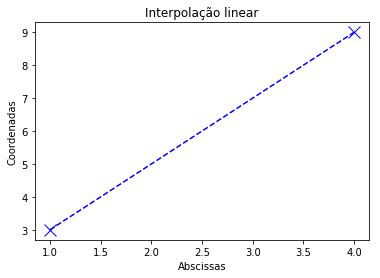

In [2]:
ax = plt.subplots(nrows=1, ncols=1)[1]
ax.set(xlabel="Abscissas", ylabel="Coordenadas", title="Interpolação linear")
ax.plot([1, 4], [3, 9], "x--b", ms=12);

Outra possível estratégia seria pegar o ponto com a abscissa mais próxima, que nesse caso seria o ponto $(1, 3)$, e usar sua ordenada como resultado.

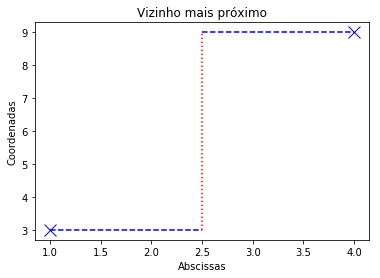

In [3]:
ax = plt.subplots(nrows=1, ncols=1)[1]
ax.set(xlabel="Abscissas", ylabel="Coordenadas", title="Vizinho mais próximo")
ax.plot([1, 2.5], [3, 3], "--b",
        [2.5, 4], [9, 9], "--b",
        [2.5, 2.5], [3, 9], ":r",
        [1, 4], [3, 9], "xb", ms=12);

E há inúmeras outras formas como podemos "unir" esses dois pontos! Esse exemplo é realmente mínimo, normalmente precisamos de mais informações sobre o contexto. Alguns exemplos com os mesmos dados que exigiriam algo mais sofisticado que o exposto até agora:

- O contradomínio pode ser limitado, extrapolar a reta obtida pela interpolação linear pode ultrapassar tais limites;

|Horas de estudo na véspera da prova|Nota obtida (de 0 a 10)|
|-|-|
|$1$|$3$|
|$4$|$9$|
|$5$|*???*|

- Podem existir pontos e assíntotas implícitas nas regras de negócio (e.g. o $(0, 0)$);

|Quantidade de itens|Preço|
|-|-|
|$1$|$3$|
|$4$|$9$|
|$2$|*???*|

- As regras que regem o resultado podem ser completamente arbitrárias.

|Número|Próxima potência de três|
|-|-|
|$1$|$3$|
|$4$|$9$|
|$3$|*???*|

É inviável falar de machine learning nesses casos. Precisamos de mais dados!

## Exercício

Ainda sem utilizar o scikit-learn, vamos criar uma classe para fazer a interpolação linear, escrita com uma interface similar à interface de estimadores do scikit-learn!

Objetivo: Preencher as lacunas marcadas com comentários `[...]` no código que segue, de maneira a garantir que o resultado impresso ao final é `[[5.]]` (um array bidimensional $1 \times 1$ com um único elemento: o número 5).

```python
import numpy as np

class LinearInterpolator:

    def fit(self, X, y):
        # [...]
        return self

    def predict(self, X):
        return # [...]

# Os dados que tínhamos!
X_train = np.array([[1],
                    [4]])
y_train = np.array([[3],
                    [9]])
X_test = np.array([[2]])

model = LinearInterpolator().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred)
```

Observação: o `X` em maiúsculo viola a [PEP8](https://www.python.org/dev/peps/pep-0008/), mas esses nomes de variáveis são uma convenção do scikit-learn. Durante o exercício, apenas mantenha esses nomes, isso será explicado melhor mais adiante.

Lembrando que a equação reduzida da reta é:

$$y = m x + q$$

e que

$$m = \frac{\Delta y}{\Delta x} = \frac{y_1 - y_0}{x_1 - x_0}$$

[Solução](resposta-exercicio-interpolacao.ipynb)

# Parte 2 - Regressão linear

Suponha que, em uma prova de estatística descritiva, os alunos tiraram as seguintes notas (ignore a coluna de índices que o Pandas exibe, o relevante é apenas o par de colunas nominadas e o *scatterplot*):

In [4]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(42)
n_hours = np.array([5.5, 8, 2.5, 7, 0, 1.25, 3.5,
                    12, 9.5, 17, 4, 0.5, 14])[:, None]
gradings = np.round(n_hours * .45 + 1 + np.random.randn(*n_hours.shape), 1)

,Horas de estudo,Nota
0,5.50,4.0
1,8.00,4.5
2,2.50,2.8
3,7.00,5.7
4,0.00,0.8
5,1.25,1.3
6,3.50,4.2
7,12.00,7.2
8,9.50,4.8
9,17.00,9.2


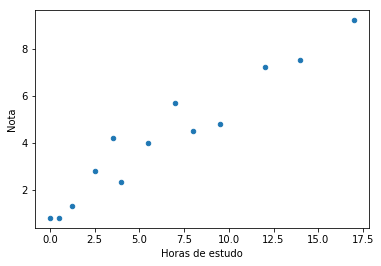

In [6]:
gradings_df = pd.DataFrame([n_hours.flat, gradings.flat],
                           index=["Horas de estudo", "Nota"]).T
gradings_df.plot.scatter(0, 1)
gradings_df

É difícil enxergar a tendência linear apenas olhando números na tabela, o scatterplot deixa isso mais evidente.

De qualquer forma, os dados não são reais, eles foram gerados a partir da reta:

$$y_i = 0.45 X_{i,0} + 1 + \varepsilon$$

em que $\varepsilon$ é um ruído normal padrão (média nula, variância unitária) somado a um ruído de arredondamento ($1$ casa decimal), e $y_i$ é a nota associada a $X_{i,0}$ horas de estudo. Conseguiríamos achar esses parâmetros $0.45$ e $1$?

O objetivo agora é estimar qual será a nota de um aluno que estudar por $11$ horas.

## Solução da regressão linear

Suponha que $X_{i,1} = 1$, isto é, há uma coluna adicional de entrada que é constante e igual a $1$.

In [7]:
regr_X = gradings_df.assign(bias=1).drop(columns=["Nota"]).values
regr_X

array([[ 5.5 ,  1.  ],
       [ 8.  ,  1.  ],
       [ 2.5 ,  1.  ],
       [ 7.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.25,  1.  ],
       [ 3.5 ,  1.  ],
       [12.  ,  1.  ],
       [ 9.5 ,  1.  ],
       [17.  ,  1.  ],
       [ 4.  ,  1.  ],
       [ 0.5 ,  1.  ],
       [14.  ,  1.  ]])

O problema passa a ser a obtenção do vetor $(w_0, w_1)$ de parâmetros que nos permita predizer a nota associada a $X_{i,0}$ horas de estudo:

$$\hat{y}_i = w_0 X_{i,0} + w_1 X_{i,1}$$

Matematicamente, a solução da regressão linear é o vetor de parâmetros $\mathbf{X}^+ \mathbf{y}$, em que $\mathbf{X}^+$ é a pseudoinversa de $\mathbf{X}$ (para uma prova matemática, veja a seção sobre regressão linear [deste link](https://github.com/danilobellini/scientific-literature/blob/master/1936-Fisher/Fisher_1936.ipynb)).

In [8]:
regr_w = np.linalg.pinv(regr_X) @ gradings_df["Nota"].values
regr_w

array([0.47649933, 1.13205242])

São valores bastante próximos de $0.45$ e $1$, mas não idênticos. Com esses valores coletados a partir dos dados, para $11$ horas, o valor de $\hat{y}$ é:

In [9]:
regr_w.dot([11, 1])

6.373545091070633

Ou $6.4$, se arredondarmos para uma casa decimal.

## Regressão linear com o scikit-learn

O modelo de regressão linear por OLS (*ordinary least squares*, mínimos quadrados) acima exposto pode não ser matematicamente complicado de ser implementado diretamente com o Numpy e o Pandas, mas com o scikit-learn isso pode ser resolvido desta forma:

In [10]:
from sklearn import linear_model

In [11]:
regr_model = linear_model.LinearRegression().fit(n_hours, gradings.flat)
regr_model.predict([[11]])

array([6.37354509])

Algumas observações:

- Chamamos o objeto `regr_model` de *estimador*
- O `fit` recebe dados ditos "de treinamento", os quais são utilizados para obtermos estatísticas/pesos necessários para gerar predições
- A coluna de valores fixos `1` (também chamada de *offset* ou viés/*bias*, responsável por tornar esse um modelo afim) não fez parte da entrada em instante nenhum: o próprio modelo já resolveu essa parte do problema (há um parâmetro de construção `fit_intercept` para controlar isso, ele por padrão é verdadeiro)
- O `predict` serve para utilizar o estimador para estimar/predizer o resultado de alguma entrada fornecida, o que neste caso significa aplicar o modelo de regressão linear
- Usar `regr_model.predict(11)` também funcionaria, mas manter sempre a convenção de utilizar o formato de uma matriz bidimensional $X$ "de entrada" evita potenciais ambiguidades
- A entrada `y` do `fit` é um array unidimensional: se fosse bidimensional, funcionaria, mas faria o resultado também ser bidimensional

Tanto para o `fit` como para o `predict`, pode-se utilizar dataframes do Pandas ao invés de arrays do Numpy:

In [12]:
linear_model.LinearRegression() \
            .fit(gradings_df.drop(columns="Nota"),
                 gradings_df["Nota"]) \
            .predict(pd.DataFrame([11]))

array([6.37354509])

O modelo/estimador obtido possui as informações de $w_0$ e $w_1$, mas isso é específico dessa classe `linear_model.LinearRegression`, outras classes de estimadores não necessariamente possuem tal informação:

In [13]:
vars(regr_model)

{'_residues': 6.081048422923146,
 'coef_': array([0.47649933]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': 1.1320524211461556,
 'n_jobs': 1,
 'normalize': False,
 'rank_': 1,
 'singular_': array([18.60934422])}

In [14]:
regr_model.coef_[0], regr_model.intercept_ # Vetor de pesos

(0.47649933362949815, 1.1320524211461556)

Visualizando o resultado desta regressão:

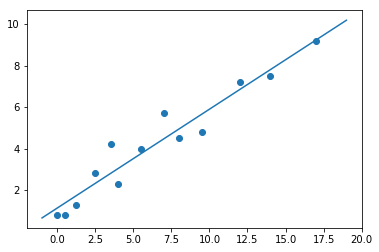

In [15]:
plt.scatter(n_hours, gradings)
plt.plot([-1, 19], regr_model.predict([[-1], [19]]));

## Exercício

Há *datasets* disponíveis com o scikit-learn. Vamos pegar o *Boston House Prices dataset* e tentar estimar um modelo de regressão linear para estimar o preço de casas em Boston.

In [16]:
from sklearn import datasets

In [17]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Os datasets que podem ser abertos diretamente com o scikit-learn são basicamente dicionários com pelo menos os seguintes valores associados às seguintes chaves:

* `DESCR`: Descrição, em texto, do conteúdo do dataset
* `data`: `np.ndarray` $2D$ com os *features* ou variáveis independentes (entrada), em que cada coluna é um *feature*
* `target`: `np.ndarray` $1D$ com os alvos ou variáveis dependentes (saída)

Quando aplicável, há ainda:

* `feature_names`: nomes dos *features* (colunas do `data`)
* `target_names`: rótulos/*labels* para cada valor possível de `target` (modelos de classificação, ainda não vimos isso)
* `images`: `np.ndarray` com a imagem de entrada (quando cada coluna/*feature* representa um pixel)

As chaves desses objetos são, também, nomes de atributos (i.e., `boston["target"]` e `boston.target` acessam o mesmo valor). Vejamos uma descrição do dataset:

In [18]:
print(boston.DESCR)
pd.DataFrame(boston.data, columns=boston.feature_names) \
  .assign(target=boston.target) \
  .head()

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Objetivo do exercício: criar um modelo de regressão linear com as 400 primeiras linhas desse dataset, e calcular o erro quadrático total com as demais linhas do dataset.

Extra: É possível realizar diversas transformações nos dados. Por exemplo, o que acontece se a regressão for realizada sem a coluna `RAD`? E se esse índice for dividido em colunas `RAD=1`, `RAD=2`, etc. para cada valor possível da coluna, criando colunas numéricas em que os únicos valores possíveis para os dados são $0$ (falso) e $1$ (verdadeiro)? Esse processo chama-se *one-hot encoding*, e costuma ser utilizado para tratar variáveis categóricas. [Este link](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode11.html) possui outras sugestões de transformações possíveis nos dados.

[Solução](resposta-exercicio-regressao.ipynb)

# Parte 3 - Classificação

**Aprendizado supervisionado** é aquele em que nós possuímos a informação do resultado/alvo para as entradas (variáveis independentes) fornecidas. Aprendemos a partir de linhas da tabela, formada por pares `(vetor_de_features, alvo)`, em que o vetor de *features* de uma entrada está associado a um valor ou classe/rótulo `alvo` mensurado/fixado, que queremos ser capazes de predizer a partir de um novo vetor de *features*. Esse é o caso que acabamos de lidar ao falar sobre regressão, e também o que acontece com a classificação: há uma coluna de alvo/*target*.

Podemos dividir o aprendizado supervisionado de acordo com a natureza da variável alvo:

* Classificação (variável dependente categórica): processo de identificação da classe-alvo a partir dos *features*
* Regressão (variável dependente quantitativa): cálculo de um número a partir das variáveis de entrada, estando presente alguma noção de métrica/distância/similaridade entre os possíveis alvos

Dependendo do contexto, há outros nomes possíveis para essa variáveis ([Dependent and independent variables na Wikipedia](https://en.wikipedia.org/wiki/Dependent_and_independent_variables)):

> [...], an independent variable is sometimes called a "predictor variable", "regressor", "controlled variable", "manipulated variable", "explanatory variable", "exposure variable" (see reliability theory), "risk factor" (see medical statistics), "feature" (in machine learning and pattern recognition) or "input variable"

> [...], a dependent variable is sometimes called a "response variable", "regressand", "predicted variable", "measured variable", "explained variable", "experimental variable", "responding variable", "outcome variable", "output variable" or "label".

## Iris dataset

Vamos abrir outro dataset famoso!

In [19]:
iris_dict = datasets.load_iris()
iris_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [20]:
print(iris_dict["DESCR"])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [21]:
iris_dict["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
iris_dict["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris_dict["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
# Saída categórica com índices para esses nomes
iris_dict["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
np.bincount(iris_dict["target"]) # 50 de cada classe!

array([50, 50, 50])

In [26]:
iris = pd.DataFrame(iris_dict["data"], columns=iris_dict["feature_names"]) \
         .assign(species=[iris_dict["target_names"][idx] for idx in iris_dict["target"]])
iris.iloc[[0, 50, 100], :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


Seriam esses dados linearmente separáveis?

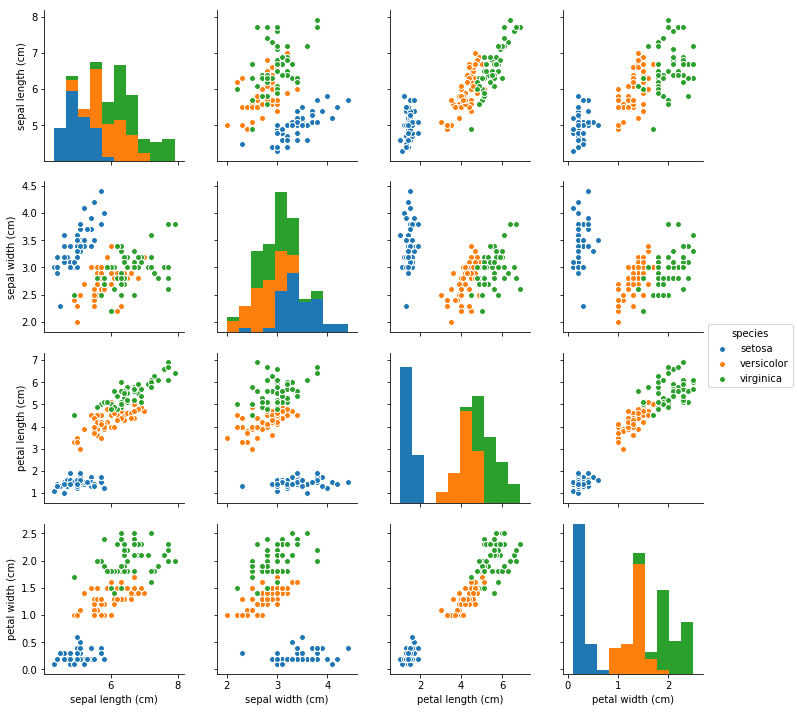

In [27]:
import seaborn as sns
sns.pairplot(iris, hue="species");

Há uma classe/espécie que é linearmente separável das demais! Você conseguiria colocar alguma reta acima em algum dos gráficos para separar uma distribuição das outras duas?

As outras duas espécies criam um bloco só, parecem mais difíceis de separar.

Esse dataset, na versão atual, contém erros de transcrição, felizmente irrelevantes para este tutorial. Caso haja interesse, veja o artigo *The use of multiple measurements in taxonomic problems* (1936) do R. A. Fisher e a análise em https://github.com/danilobellini/scientific-literature para mais informações sobre o Iris, discriminantes lineares e o fundamento estatístico de parte do que será visto a seguir.

# Classificadores no scikit-learn

No scikit-learn, há um padrão para todos os **estimadores**, objetos que são treinados para estimar/predizer valores. No caso da regressão e da classificação, como já vimos, fazemos isso com os métodos `fit` e `predict`, um para treinar o estimador, o outro para utilizá-lo.

```python
from sklearn import módulo_com_estimador
estimator = módulo_com_estimador.ClasseDoEstimador(*args, **kwargs)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
```

Cada entrada pode ser tanto um *array* do NumPy como um *dataframe* do Pandas na estrutura de tabela já vista, mantendo os nomes `X` e `y`:

* `X_train` e `X_test` são $2D$ e possuem um exemplo/exemplar/item por linha, uma informação/*feature* por coluna, é como as matrizes do campo `data` dos datasets que vêm com o scikit-learn
* `y_train` é $1D$ e possui o resultado de cada respectivo evento, i.e., `y_train[i]` é o resultado do vetor de features `X_train[i]`

Obs.: Os nomes `X_train` e `X_test` não seguem a [PEP8](https://www.python.org/dev/peps/pep-0008/). Eles decorrem do uso tradicional de letras maiúsculas para representar matrizes e letras minúsculas para representar vetores, em matemática. A variável `X` é tradicionalmente utilizada para as matrizes de "entrada" e a `y` para o vetor (matriz coluna) de "saída". Porém, isso é apenas uma convenção de nomes, o contexto pode sugerir nomes mais descritivos.

Segue uma lista não-exaustiva dos classificadores disponíveis no scikit-learn:

* `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
* `sklearn.ensemble.AdaBoostClassifier`
* `sklearn.ensemble.RandomForestClassifier`
* `sklearn.gaussian_process.GaussianProcessClassifier`
* `sklearn.linear_model.LogisticRegressionCV`
* `sklearn.linear_model.Perceptron` $\rightarrow$ possui `partial_fit`
* `sklearn.naive_bayes.GaussianNB` $\rightarrow$ possui `partial_fit`
* `sklearn.neighbors.KNeighborsClassifier`
* `sklearn.neural_network.MLPClassifier` $\rightarrow$ possui `partial_fit`
* `sklearn.svm.LinearSVC`
* `sklearn.svm.SVC`
* `sklearn.tree.DecisionTreeClassifier`

É possível identificar a espécie de Iris a partir das $4$ medidas (largura e comprimento das sépalas e pétalas)?

In [28]:
X = iris.iloc[:, :4]
y = iris["species"]

In [29]:
from sklearn import svm # SVM = Support Vector Machine
svm_estimator = svm.SVC(kernel="linear") # Classificador linear
svm_estimator.fit(X, y) # Treino!
svm_estimator.predict(X) # Parece com 50 setosa, 50 versicolor, 50 virginica?

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

Qual é a proporção de acertos?

In [30]:
svm_estimator.score(X, y) # Realiza o predict internamente

0.9933333333333333

## Overfitting

Quando temos um classificador, como podemos avaliá-lo?

Poderíamos usar os dados que temos para realizar essa avaliação, porém se esses dados são os mesmos utilizados para treinar o estimador, talvez estejamos propagando um vício sem saber, obtendo um resultado demasiado otimista devido à falta de variabilidade. O nome dado a esse resultado é **overfitting**.

Para auxiliar o entendimento do conceito, podemos fazer uma analogia disso com a aplicação de uma prova depois de uma aula. Durante a aula, o aluno pode encontrar um padrão como "*as respostas desse tipo de exercício formam uma P.A.*", por isso ter ocorrido nos exemplos mostrados, e achar que essa regra generalizava o que foi ensinado. Mas, se o padrão encontrado era meramente contingencial, esse aluno poderá se sair mal na prova por responder com os detalhes irrelevantes que memorizou ao invés de tentar aprender o conteúdo.

Por outro lado, em uma aula o professor explicita o que é esse conteúdo, enquanto que em generalizações realizadas a partir de dados, qualquer padrão, mesmo que não seja considerado o mais simples por algum critério, pode ser o conteúdo, e o que queremos testar é se o padrão encontrado faz sentido como generalização dos dados e dos eventos futuros. Uma forma de testar isso é reservando uma parte dos dados que temos para validar/testar a generalização realizada a partir dos demais dados.

## Dividindo o dataset em 2 partes

Uma prática comum em *machine learning* é a de dividir os dados fornecidos em $2$ conjuntos: um para a realização do treinamento (`fit`) do estimador, outro para a realização de uma avaliação do estimador obtido. Um conjunto para o "treino", outro para "testes". Entre os diversos modelos, adota-se o que minimiza o erro olhando apenas para o conjunto de testes:

[![](../2017-10-26_scikit-learn/overfitting.png)](https://en.wikipedia.org/wiki/File:Overfitting_svg.svg)

(Imagem obtida no Wikipedia)

As curvas do gráfico acima representam a taxa de erro quando avaliamos o modelo com o conjunto de testes (vermelho) ou com o conjunto de treino (azul). O eixo das abscissas representa os modelos, por exemplo os resultados de cada iteração de um processo de treinamento. Continuar um treinamento pode nos levar a uma contínua melhora na acurácia do modelo quando olhamos somente para o conjunto de treinamento, mas em algum instante o resultado aplicado ao conjunto de testes indica que o modelo começou a perder acurácia: overfitting.

In [31]:
from sklearn import model_selection

In [32]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                     test_size=.25,
                                     random_state=0)

Isso separou $25\%$ dos dados para teste e $75\%$ para treino. Esse é o *default* do scikit-learn, o argumento nominado `test_size` não precisava ter sido passado nesse caso, mas é útil explicitar esse número, e torna prático mudá-lo, caso necessário.

Poderíamos fazer esse particionamento manualmente, mas isso já particionou nossos dados embaralhando-os, sem perder a correspondência de índices entre as respectivas entradas e saídas.

In [33]:
# Chamar o `fit` novamente sobreescreve os dados, apagando o treino anterior!
# Classificadores que permitem aprendizado incremental possuem um método `partial_fit`!
svm_estimator.fit(X_train, y_train)
y_pred = svm_estimator.predict(X_test)

Como podemos avaliar se esse resultado `y_pred` é similar ao `y_test`?

## Confusion matrix

Podemos realizar avaliações sumarizando os erros e acertos de cada natureza em uma matriz:

In [34]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

As linhas representam os resultados coletados, as colunas representam os resultados estimados. Cuidado para não se confundir: isso é o transposto do [exposto no Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix), mas é a forma descrita na documentação do scikit-learn.

O scikit-learn sempre ordena os dados ao apresentá-los, de maneira que as 3 linhas e as 3 colunas referem-se às espécies *setosa*, *versicolor* e *virginica* (ou 0, 1 e 2, se estivéssemos usando o `datasets.load_iris()["target"]`), nesta ordem. Para fixar uma ordem qualquer, usa-se o argumento nominado `labels`.

Colocando rótulos com o Pandas para melhorar a visualização:

In [35]:
labels = ["setosa", "versicolor", "virginica"]
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=labels),
             index=[["y_test"] * 3, labels],
             columns=[["y_pred"] * 3, labels])

y_pred                     
                  setosa versicolor virginica
y_test setosa         13          0         0
       versicolor      0         15         1
       virginica       0          0         9

## Resumo

Sobre classificação, o que fizemos até o momento pode ser re-escrito da seguinte forma, sem utilizar o Pandas:

In [36]:
from sklearn import datasets, model_selection, svm, metrics

iris_dict = datasets.load_iris()

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(iris_dict["data"], iris_dict["target"],
                                     test_size=.25, random_state=0)

# Extra: o "fit" devolve o próprio objeto estimador
svm_estimator = svm.SVC(kernel="linear").fit(X_train, y_train)
y_pred = svm_estimator.predict(X_test)
metrics.confusion_matrix(y_test, y_pred) # Implicitamente labels=[0, 1, 2]

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [37]:
svm_estimator.score(X_test, y_test)

0.9736842105263158

Sem fixar o `random_state`, o resultado talvez não seja o mesmo, pois chamar `train_test_split` re-embaralha os dados.

## Exercício

Utilizando as técnicas vistas, treinar um classificador para separar os seguintes blobs gerados aleatoriamente, avaliando o resultado obtido:

In [38]:
X_blob, y_blob = datasets.make_blobs(n_samples=2500, n_features=2, centers=5, random_state=17)

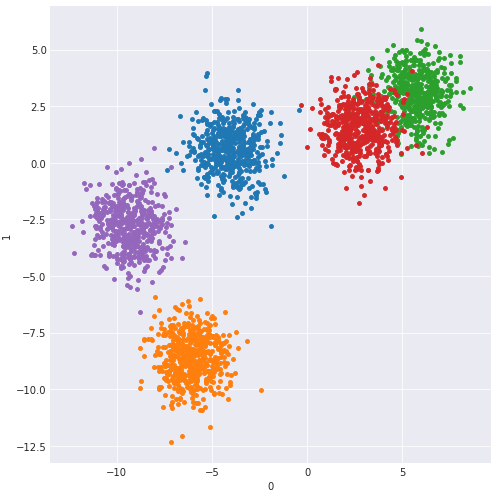

In [39]:
with sns.axes_style("darkgrid"):
    sns.FacetGrid(pd.DataFrame(X_blob).assign(y=y_blob), hue="y", aspect=1, size=7) \
       .map(plt.scatter, 0, 1, s=15)

[Solução para os dados fornecidos](resposta-exercicio-classificacao.ipynb)

[Solução para n_samples=2000, centers=4, random_state=32](../2017-10-26_scikit-learn/resposta-exercicio-1.ipynb)

# Parte 4 - Combinando blocos

Para o que foi feito até agora, é suficiente saber que o classificador `sklearn.svm.SVC(kernel="linear")` e o `sklearn.svm.LinearSVC` encontram um discriminante linear para separar as classes, maximizando a distância com relação às amostras (margem larga), a depender do valor do `C` (quanto maior, mais tenderá à margem máxima).

Porém, um discriminante linear é um hiperplano no espaço de *features* que consegue apenas separar duas classes (espécies, no caso do Iris dataset). Para funcionar com múltiplas classes, o `sklearn.svm.SVC` resolve isso agindo como um "one-on-one classifier". O que é isso? Tem alternativa?

## Multi-classes

Essas classes são *decorators* (no sentido do *design pattern*) para classificadores binários:

* `sklearn.multiclass.OneVsOneClassifier`: Classifica todos os pares de classes separadamente, selecionando o que tiver o maior número de votos
* `sklearn.multiclass.OneVsRestClassifier`: Cria um classificador para cada classe, avaliando se pertence à mesma ou ao conjunto de todas as demais classes

No caso do SVM, se quiséssemos usá-lo como *one-vs-rest*, teríamos de instanciar o estimador desta maneira:

In [40]:
from sklearn import multiclass
one_vs_rest_svm_estimator = multiclass.OneVsRestClassifier(svm.SVC(kernel="linear"))
one_vs_rest_svm_estimator.fit(X_train, y_train)
one_vs_rest_svm_estimator.score(X_test, y_test)

0.9210526315789473

Temos acesso aos classificadores binários:

In [41]:
one_vs_rest_svm_estimator.estimators_

[SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)]

O método `decision_function` do estimador (classificador) binário é usado como critério de desempate, ou a primeira coluna do `predict_proba`, que representa a probabilidade da classe "positiva".

In [42]:
# No caso do SVM, estas são as distâncias com relação ao
# hiperplano que separa as classes
one_vs_rest_svm_estimator.estimators_[0].decision_function(X_test)

array([-3.58459897, -2.15411929,  1.89199335, -4.52609987,  1.39684192,
       -4.29544529,  1.60323992, -2.65028866, -2.86540149, -1.98461469,
       -3.74016002, -2.38375773, -2.64026621, -2.6974942 , -2.68086321,
        1.29117385, -2.52210662, -2.41636546,  1.25101273,  1.74739869,
       -3.18923262, -2.45158845,  1.00481639,  1.26350425, -3.02357691,
        2.02104714,  1.10714364, -2.23785545, -1.35409061,  1.20373409,
       -3.57813571, -2.44243775,  1.43990798, -3.01486208, -4.0207076 ,
       -1.94176612,  1.32668652, -3.27471138])

In [43]:
# Quando não é um classificador binário, cada coluna do
# `decision_function` refere-se a um classificador binário
one_vs_rest_svm_estimator.decision_function(X_test)

array([[ -3.58459897,  -0.92348443,   2.33275035],
       [ -2.15411929,   0.75997811,  -2.27721574],
       [  1.89199335,  -2.78555586, -10.22889684],
       [ -4.52609987,  -0.47091046,   2.40364536],
       [  1.39684192,  -1.36923269,  -9.01408977],
       [ -4.29544529,  -1.66880518,   3.61569843],
       [  1.60323992,  -1.64733995,  -9.32226525],
       [ -2.65028866,  -0.97173427,  -1.138744  ],
       [ -2.86540149,  -0.36455685,  -0.97910331],
       [ -1.98461469,  -0.47295318,  -2.24734191],
       [ -3.74016002,   0.14842487,   1.43498217],
       [ -2.38375773,  -1.18956441,  -1.37695212],
       [ -2.64026621,  -0.26532064,  -0.96415879],
       [ -2.6974942 ,  -0.46934076,  -0.96076673],
       [ -2.68086321,  -0.56340739,  -0.6694658 ],
       [  1.29117385,  -0.78384098,  -8.8948682 ],
       [ -2.52210662,  -0.66725593,  -0.82027139],
       [ -2.41636546,   0.01877505,  -0.93981856],
       [  1.25101273,  -0.75379295,  -8.57956781],
       [  1.74739869,  -2.40605

Para mais informações sobre classificadores multi-classe, veja http://scikit-learn.org/stable/modules/multiclass.html

## Pré-processamento

Dependendo do estimador, um ajuste aditivo/multiplicativo para normalização da entrada pode ser fundamental para treiná-lo, influenciando o comportamento do mesmo. O fluxo do pré-processamento é similar ao de classificação, dessa vez com os métodos `fit` e `transform`:

```python
from sklearn import preprocessing
pre_processor = preprocessing.ClasseDePréProcessamento(*args, **kwargs)
pre_processor.fit(X_train) # Encontra os parâmetros para pré-processar
X_data_p = pre_processor.transform(X_data) # Processa um conjunto de dados
```

Quando aplicado nos dados de treino, esse passo de transformação/pré-processamento passa a ser parte do pipeline de classificação, sendo necessário aplicá-lo nos dados antes do `predict` do classificador:

```python
X_train_p = pre_processor.transform(X_train)
X_test_p = pre_processor.transform(X_test)

estimator.fit(X_train_p, y_train) # Classificador do dado pré-processado!
y_pred = estimator.predict(X_test_p) # Predição também exige dado pré-processado!
```

## Normalização

Classes comuns para pré-processar colunas/*features* independentemente incluem:

* `StandardScaler`: subtrai a média e divide pelo desvio padrão
* `RobustScaler`: subtrai a mediana e divide pelo IQR
* `MinMaxScaler`: transformação afim do intervalo `[mínimo, máximo]` dos dados para o intervalo `[0, 1]`
* `MaxAbsScaler`: transformação afim do intervalo `[-m, m]` para o intervalo `[-1, 1]`, em que `m` é o máximo do valor absoluto do *feature*

Usando `MinMaxScaler`, o que muda?

In [44]:
from sklearn import preprocessing
iris_scaler = preprocessing.MinMaxScaler()
iris_scaler.fit(X_train)
X_train_p = iris_scaler.transform(X_train)

In [45]:
iris_measurements = [cname.rsplit(None, 1)[0] for cname in iris_dict["feature_names"]]
iris_p = pd.DataFrame(X_train_p, columns=iris_measurements) \
           .assign(species=[iris_dict["target_names"][idx] for idx in y_train])

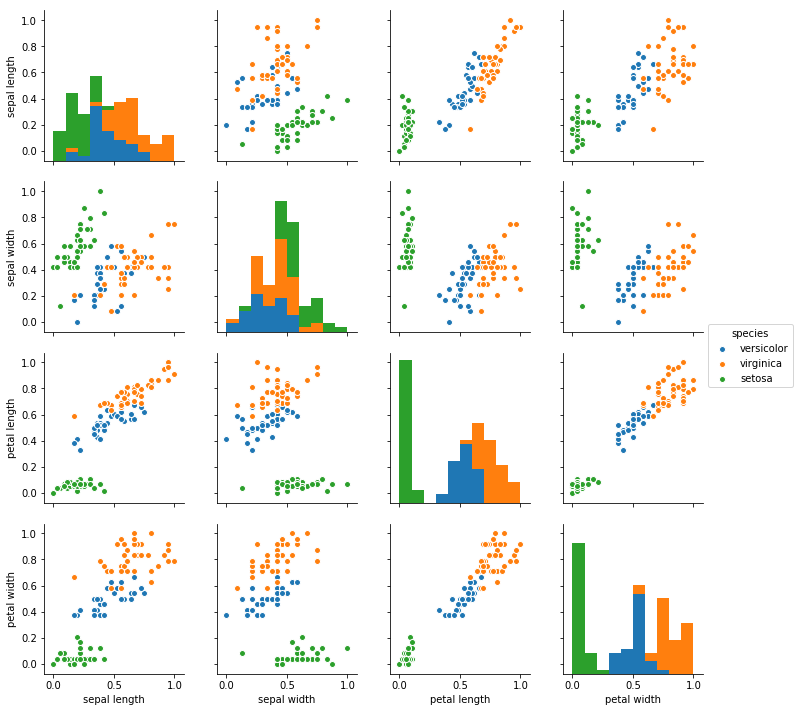

In [46]:
sns.pairplot(iris_p, hue="species");

Como exceção, a classe `sklearn.preprocessing.Normalizer` realiza um pré-processamento em cada linha, isoladamente, para esta ter norma unitária. Por não ter estado, o método `fit` de tal classe não faz nada, porém ele existe para que essa classe possa fazer parte de uma pipeline.

In [47]:
X_train_p_normalized = preprocessing.Normalizer().transform(X_train_p)
iris_p_normalized = pd.DataFrame(X_train_p_normalized, columns=iris_measurements) \
                      .assign(species=[iris_dict["target_names"][idx] for idx in y_train])

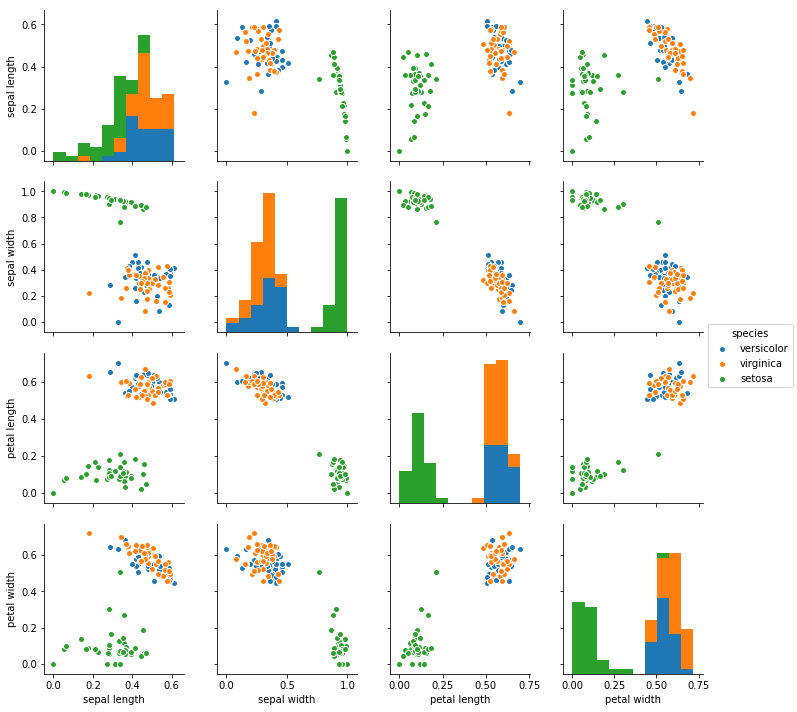

In [48]:
sns.pairplot(iris_p_normalized, hue="species");

O `Normalizer` realizou uma transformação não-linear!

## Pipeline

É um pouco burocrático ter de realizar o pré-processamento manualmente antes do classificador:

```python
from sklearn import preprocessing, módulo_com_classificador

pre_processor = preprocessing.ClasseDePréProcessamento(*args, **kwargs)
pre_processor.fit(X_train)

X_train_p = pre_processor.transform(X_train)
classifier = módulo_com_classificador.ClasseDoClassificador(*args, **kwargs)
classifier.fit(X_train_p, y_train)

X_test_p = pre_processor.transform(X_test)
y_pred = classifier.predict(X_test_p)
```

Na prática, queremos um objeto classificador que abstraia o processo inteiro de pré-processamento e de classificação, isto é, um classificador que já realiza o pré-processamento, para não ser necessário pré-processar cada entrada antes de usar o classificador. A realidade é que isso existe! O `sklearn.pipeline.Pipeline` conecta blocos de pré-processamento (objetos com `fit` e `transform`) a um único classificador recebendo uma lista de pares:

```python
from sklearn import pipeline
pipeline_classifier = pipeline.Pipeline([
    ("Nome da etapa 1 de pré-processamento", objeto_pre_processador1),
    ("Nome da etapa 2 de pré-processamento", objeto_pre_processador2),
    # ...
    ("Nome da etapa N de pré-processamento", objeto_pre_processadorN),
    ("Nome da etapa de classificação", objeto_classificador),
])
```

ou, usando nomes automáticos para as etapas, com `sklearn.pipeline.make_pipeline`:

```python
pipeline_classifier = pipeline.make_pipeline(
    objeto_pre_processador1,
    objeto_pre_processador2,
    # ...
    objeto_pre_processadorN,
    objeto_classificador,
)
```

In [49]:
from sklearn import pipeline
pipeline.Pipeline([("normaliza", preprocessing.StandardScaler()),
                   ("classifica", svm.LinearSVC())]) \
        .fit(X_train, y_train) \
        .score(X_test, y_test)

0.9473684210526315

## Exercício: OCR de números!

O scikit-learn possui um dataset de dígitos escritos à mão:

In [50]:
digits_dict = datasets.load_digits()

Vamos visualizar os primeiros 10 dígitos:

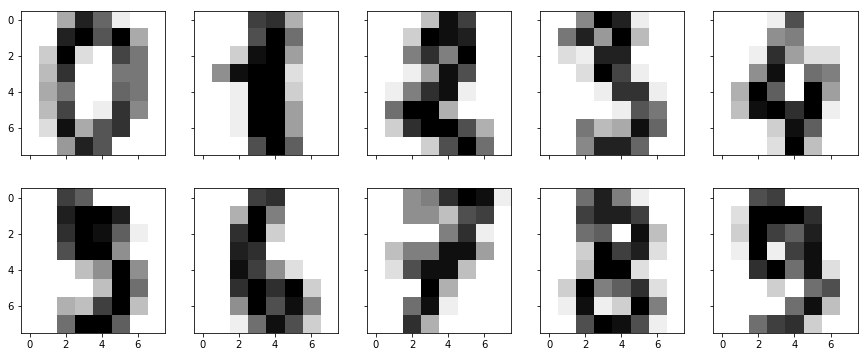

In [51]:
axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)[1]
for idx, ax in enumerate(axes.flat):
    ax.imshow(digits_dict["images"][idx], cmap=plt.cm.gray_r)

*Parte 1*: Bisbilhotar/fuçar/investigar esse dataset. Nesse passo é preciso, no mínimo, identificar o tamanho de cada imagem, o número total de imagens e a quantidade de cada dígito presente.

*Parte 2*: Utilizando algum dos classificadores disponíveis com o scikit-learn e as técnicas já vistas, criar um OCR para dígitos a partir desse dataset, reservando $30\%$ do mesmo para a realização de uma avaliação exposta na forma de uma matriz de erro.

[Vídeo de lightning talk resolvendo o exercício em 9 minutos](https://youtu.be/kDmsYpRuNPA?t=45m50s)

[Solução (material produzido na lightning talk)](../2017-11-13_OCR_GruPy-SP_10_anos.ipynb)

# Parte 5 - Aprendizado não-supervisionado

Até agora estudamos apenas o processo de classificação supervisionada, no qual tínhamos um número ou um rótulo categórico associado a cada vetor de *features*, e gostaríamos de predizê-lo quando novos dados surgissem. Se tivéssemos apenas os *features*, poderíamos inferir alguma informação a partir dos mesmos? Sim, e esses são os processos de aprendizado não-supervisionados.

## Clustering com o k-means

Provavelmente o algoritmo mais famoso de clustering é o k-means. Ele está implementado no scikit-learn na classe `sklearn.cluster.KMeans`. Como classificador, ele possui os métodos `fit` e `predict`, mas dessa vez o `fit` recebe apenas uma matriz de features para treinamento, e os labels são apenas números de $0$ a $k - 1$.

O k-means realiza um ciclo para a obtenção de "centróides":

1. Define $k$ pontos como centróides
2. Classifica cada ponto (linha da matriz de entrada) com o centróide mais próximo do mesmo (distância euclideana, tipicamente)
3. Atualiza os centróides com os novos centróides de cada conjunto classificado

A repetição dos passos $2$ e $3$ até a convergência é o que caracteriza o algoritmo.

[![](../2017-10-26_scikit-learn/K-means_convergence.gif)](https://en.wikipedia.org/wiki/File:K-means_convergence.gif)

(Imagem obtida no Wikipedia)

Para exemplificar na prática, vamos aplicar o k-means aos blobs gerados anteriormente!

In [52]:
from sklearn import cluster

In [53]:
# O primeiro parâmetro é o número de clusters
kmeans_model = cluster.KMeans(5, random_state=42)
kmeans_model.fit(X_blob)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [54]:
y_blob_pred = kmeans_model.predict(X_blob)

Mesmo sem conhecer as classes de cada amostra, o algoritmo encontrou $5$ clusters a partir apenas dos pares de coordenadas de cada ponto. Vamos comparar visualmente o resultado desse processamento.

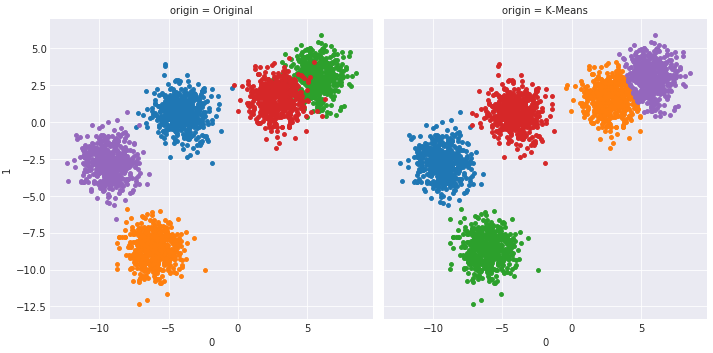

In [55]:
X_blob_dframe = pd.DataFrame(X_blob)
full_blob_dframe = pd.concat([
    X_blob_dframe.assign(y=y_blob, origin="Original"),
    X_blob_dframe.assign(y=y_blob_pred, origin="K-Means")
])
with sns.axes_style("darkgrid"):
    sns.FacetGrid(full_blob_dframe, hue="y", col="origin",
                  aspect=1, size=5, sharey=True) \
       .map(plt.scatter, 0, 1, s=15)

Parecem bastante próximos! As cores diferentes apenas representam que o índice arbitrário de cada cluster não são iguais. Podemos fingir que esse processamento foi supervisionado e calcular uma matriz de erro.

In [56]:
# Casamento/reordenação das classes realizada empiricamente de forma a
# fazer a diagonal da matriz ter os maiores valores de cada coluna
metrics.confusion_matrix(y_blob, np.array([4, 3, 1, 0, 2])[y_blob_pred])

array([[498,   0,   0,   1,   1],
       [  0, 500,   0,   0,   0],
       [  0,   0, 474,  26,   0],
       [  0,   0,  28, 472,   0],
       [  1,   1,   0,   0, 498]])

Apenas $58$ dos $2500$ pontos usados para gerar os blobs não coincidiram. Mesmo sendo uma técnica de aprendizado não-supervisionado, pode-se dizer que ela foi eficaz em identificar as classes nesse caso artificial.

## Exercício

Aplicar o k-means ao Iris dataset e verificar o resultado através de uma matriz de erro. O k-means consegue classificar corretamente as $3$ espécies? E se usássemos outro valor para o $k$, como $2$, $4$ ou $6$, o que acontece?

[Solução](resposta-exercicio-clustering.ipynb)

## Separação de fontes de áudio com ICA - Independent Component Analysis

Dado um arquivo de áudio stereo, por exemplo:

https://freesound.org/s/380165/

Podemos separar os lados esquerdo e direito do áudio, convertendo em dois arquivos WAVE, `left.wav` e `right.wav`, usando o FFmpeg:

```shell
ffmpeg -i arquivo_baixado.mp3 -map_channel 0.0.0 left.wav -map_channel 0.0.1 right.wav
```

Os lados esquerdo e direito são muito similares nesse arquivo de áudio, mas seria possível separar as duas fontes sonoras (os $2$ cantores), ou pelo menos criar dois arquivos de áudio em que algum dos cantores está em maior evidência que o outro?

Vamos tentar encontrar componentes independentes no áudio usando o `sklearn.decomposition.FastICA`.

Para ler os arquivos de áudio como um *array* do NumPy e armazenar depois os resultados em arquivos WAVE, vamos utilizar o módulo `scipy.io.wavfile` do SciPy:

In [57]:
from scipy.io import wavfile
rate, left = wavfile.read("left.wav")
right = wavfile.read("right.wav")[1]
rate # Amostras de áudio por segundo

44100

In [58]:
audio_input = np.stack([left, right]).T
audio_input.shape # Par (amostras por canal, número de canais)

(5178240, 2)

In [59]:
audio_input.dtype

dtype('int16')

O FastICA no scikit-learn é um algoritmo de decomposição, o qual se comporta como uma rotina de pré-processamento.

In [60]:
from sklearn import decomposition
ica = decomposition.FastICA(n_components=2, random_state=42)
ica

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=2, random_state=42, tol=0.0001, w_init=None, whiten=True)

Assim como outros modelos de pré-processamento, há um método `fit_transform` que unifica os dois passos `fit` e `transform` já vistos, e pode ser mais eficiente caso o processo do `fit` já exija o cálculo do resultado esperado pelo `transform`. A expressão:

```python
processor.fit_transform(X)
```

é funcionalmente equivalente a:

```python
processor.fit(X).transform(X)
```

In [61]:
output = preprocessing.MaxAbsScaler().fit_transform(ica.fit_transform(audio_input))

In [62]:
wavfile.write("result_0.wav", rate, output[:, 0])
wavfile.write("result_1.wav", rate, output[:, 1])

Os resultados desse processamento estão disponíveis nos links:

* `result_0.wav`: https://freesound.org/s/406216/
* `result_1.wav`: https://freesound.org/s/406215/

As vozes não estão totalmente separadas, mas, por exemplo, a partir do instante 1:37 (últimos 20 segundos) é possível notar que cada áudio destaca mais uma das vozes, distintamente, sem distorcê-las.

É possível obter resultados melhores usando técnicas específicas para essa finalidade, mas é importante notar que esse processo de segregação em componentes independentes não utilizou nada além do arquivo de áudio stereo.

Para maiores detalhes sobre ICA no scikit-learn, vejam estes dois exemplos na documentação do scikit-learn:

* http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html
* http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html

O primeiro link contém, em particular, uma decomposição de sinais sintéticos, o qual ilustra bem o processo de decomposição realizado.

# Parte Final - O aprendizado não acaba aqui!

Há muitas coisas importantes que não puderam ser apresentadas neste tutorial introdutório, desde questionamentos gerais de ciência de dados:

* Como coletar os dados, e como esse processo pode influenciar os processos que seguem?
* Como identificar quais dados são relevantes para um estimador?
* Como tratar dados incompletos, espúrios e outliers?

Como questionamentos mais diretamente vinculados ao scikit-learn:

* Como selecinar o algoritmo de classificação?
* Como podemos fazer para encontrar o valor ideal do `k`?
* Como encontrar os melhores coeficientes do SVM?
* Como tratar *features* categóricos?

Parte desse conteúdo exige conhecimento não apenas do scikit-learn, mas com outras bibliotecas. Por exemplo, para tratar features categóricos pode-se usar o `sklearn.preprocessing.OneHotEncoder`, mas talvez o `pd.get_dummies` do Pandas seja mais adequado para o que se deseja fazer.

Minha sugestão para o autodidata que deseja continuar aprendendo sobre scikit-learn é que procure por material sobre:

* PCA: Decomposição fundamentada nas dimensões de maior variabilidade comumente utilizada para redução da dimensionalidade
* Grid Search: busca exaustiva por parâmetros para os estimadores
* Criação de classes personalizadas de estimadores e de transformadores, usadas em pipelines incluindo *feature union*

E veja os exemplos disponibilizados em http://scikit-learn.org/stable/auto_examples/index.html

# FIM! Espero que tenha gostado! =D